In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("HR.csv")

In [32]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [34]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [35]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [36]:
df.duplicated().sum()

3008

In [37]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [38]:
df.left

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

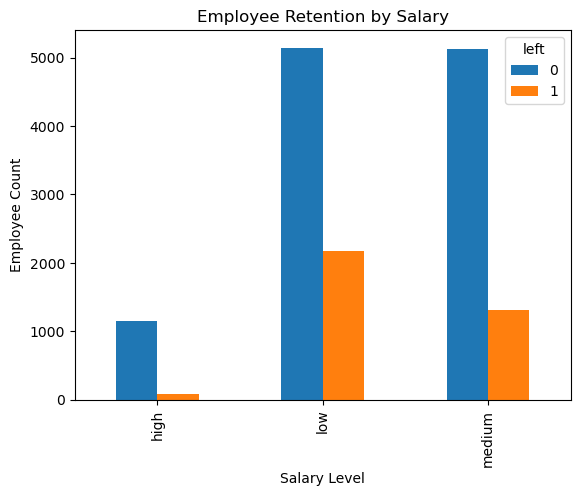

In [39]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.xlabel("Salary Level")
plt.ylabel("Employee Count")
plt.title("Employee Retention by Salary")
plt.show()


<Axes: xlabel='Department'>

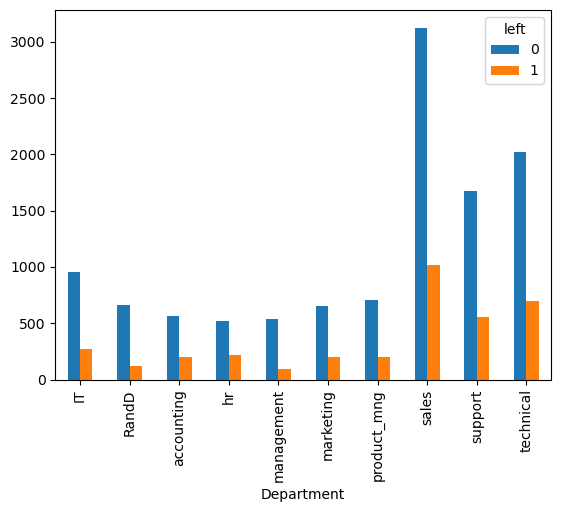

In [40]:
pd.crosstab(df.Department, df.left).plot(kind='bar')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Select important features
df_model = df[['satisfaction_level', 'average_montly_hours',
               'promotion_last_5years', 'salary', 'Department', 'left']]

# One-hot encoding
df_dummies = pd.get_dummies(df_model, drop_first=True)

X = df_dummies.drop('left', axis=1)
y = df_dummies['left']


In [43]:
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,157,0,True,False,False,False,False,False,False,False,True,False,False
1,0.80,262,0,False,True,False,False,False,False,False,False,True,False,False
2,0.11,272,0,False,True,False,False,False,False,False,False,True,False,False
3,0.72,223,0,True,False,False,False,False,False,False,False,True,False,False
4,0.37,159,0,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,True,False,False,False,False,False,False,False,False,True,False
14995,0.37,160,0,True,False,False,False,False,False,False,False,False,True,False
14996,0.37,143,0,True,False,False,False,False,False,False,False,False,True,False
14997,0.11,280,0,True,False,False,False,False,False,False,False,False,True,False


In [44]:
df_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,157,0,1,True,False,False,False,False,False,False,False,True,False,False
1,0.80,262,0,1,False,True,False,False,False,False,False,False,True,False,False
2,0.11,272,0,1,False,True,False,False,False,False,False,False,True,False,False
3,0.72,223,0,1,True,False,False,False,False,False,False,False,True,False,False
4,0.37,159,0,1,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,True,False,False,False,False,False,False,False,False,True,False
14995,0.37,160,0,1,True,False,False,False,False,False,False,False,False,True,False
14996,0.37,143,0,1,True,False,False,False,False,False,False,False,False,True,False
14997,0.11,280,0,1,True,False,False,False,False,False,False,False,False,True,False


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
model.score(X_test, y_test)


0.7653333333333333